# Treatment of null values using appropriate column

In [51]:
import pandas as pd
import numpy as np

## Variable Notes
#### pclass: A proxy for socio-economic status (SES)
>1st = Upper

>2nd = Middle

>3rd = Lower

#### Survived:	
>if it's a "1", the passenger survived.

>if it's a "0", the passenger died.

#### age:   Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

#### sibsp:   The dataset defines family relations in this way...
#### Sibling = brother, sister, stepbrother, stepsister
#### Spouse = husband, wife (mistresses and fiancés were ignored)

#### parch:   The dataset defines family relations in this way...
#### Parent = mother, father
#### Child = daughter, son, stepdaughter, stepson
#### Some children travelled only with a nanny, therefore parch=0 for them.
#### Fare:   Cost of Tickets
#### embarked:	 Port of Embarkation( port Locations)	
>C = Cherbourg

>Q = Queenstown

>S = Southampton

## Reading Data

In [52]:
train_data = pd.read_csv(r'C:\Users\chandu\Documents\Python Scripts\Machine Learning\Projects\Projects to be done\train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handling Missing Data

In [54]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

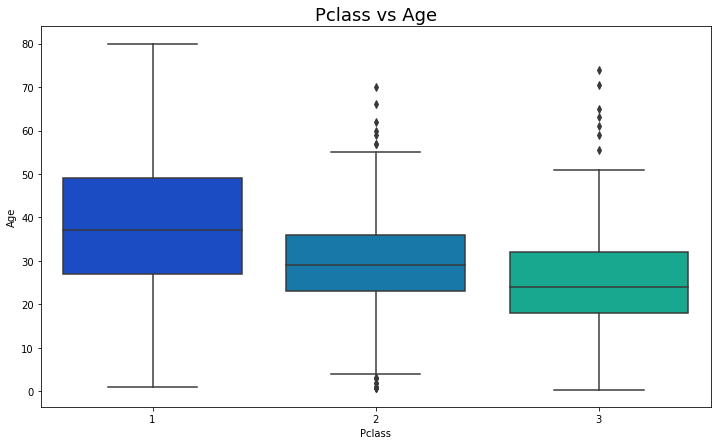

In [56]:
plt.figure(figsize=(12, 7))
plt.title('Pclass vs Age',fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter');

In [57]:
#As we found some outliers present in our dataset, so we group pclass and age with median values
#in a
train_data.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [58]:
#this code is used to fill values with its median in place of null values
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [59]:
train_data['Age'] = train_data[['Age','Pclass']].apply(add_age,axis=1)
train_data['Age'].isna().sum()

0

In [60]:
train_data['Embarked'].isna().sum()

2

We had only 2 null values in Embarked variable we can either drop Embarked or fill it with most repeted values

In [61]:
train_data.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

Here S looks like most repeted value so we replace it with it

In [62]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
train_data['Embarked'].isna().sum()

0

In [63]:
# Here Cabin had more number of null values so we drop it from out train data
#We can do any other treatment in order to fix issue but it may leads to data imbalance
train_data = train_data.drop('Cabin', axis=1) 

In [39]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Thank you